$\textbf{Introduction}$

We cannot use linear models for problems of classification.  In such problems the dependent variable is a binary variable taking on the values 0 or 1.  Or a set of variables for several discrete outcomes, such as student ratings of teaching performance.  To get the dependent variable to fall between zero or one, or between a set of variables beween 1 and 5, as in most survey evaluation data, we need to use a squasher function on the set of exogenous variables or characteristics.  We thus move into nonlinear estimaiton.  We discuss Logit and Probit models first, then two methods from Machine Learning:  Random Forests and Neural Networks.


$\textbf{Logit and Probit Regression}$

$\textit{Logit Models}$

Logit analysis assumes the following relation between probability $p_{i\text{ }}$ of the binary dependent variable $y_{i}$, taking values zero or one, and the set of k explanatory variables $x_i$:

Defining the logistic function L as a function of $x_{i}$ and the parameter set $\beta$, it has the following form:

$L_{i}= (x_{i},\beta) = \frac{1}{1+e^{-[\Sigma x_{i}\beta]}}$





This is also called Logistic Regression.  The function is also called a Logsigmoid function.

To estimate the parameters $\beta$, we simply maximize the following  likelihood function
$\Lambda$ with respect to the parameter vector $\beta\underset{<\beta>}$


${Max}\Lambda	={\displaystyle \prod}\left(L_{i}\right)^{y_{i}}\left(1-L_{i}\right)^{1-y_{i}}
	={\displaystyle \prod}%
\left(\frac{1}{1+e^{-[x_{i}\beta]}}\right)^{y_{i}}\left(\frac{e^{-[x_{i}\beta]}}{1+e^{-[x_{i}\beta]}}\right)^{1-y_{i}}$

where $y_{i\text{ }}$ represents the observed discrete outcomes.

For optimization, it is sometimes easier to optimize the sum of the log probability functions rather than the product of the probability functions :

$\ln(\Lambda):\underset{<\beta>}{Max}\ln(\Lambda)=y_{i}\ln(L_{i})+(1-y_{i})\ln\left(1-L_{i}\right)$

The k dimensional coefficient vector $\beta$ does not represent a set of partial derivatives with respect to characteristics $x_{k}$.  The partial derivative comes from the following expression:

$\frac{\partial L_{i}}{\partial x_{i,k}}=\frac{e^{x_{i}\beta}}{\left(1+e^{x_{i}\beta}\right)^{2}}\beta_{k}$

Or more simply:

$\frac{\partial L_{i}}{\partial x_{i,k}}= L_{i}(1-L_{i})\beta_{k}$

So it is easy to compute the partial derivatives.




The partial derivatives are of particular interest if we wish to identify critical ”characteristics” which increase or decrease the likelihood of being in a particular state or category, such as representing a risk of default on a loan,  or surviving the Titanic.  In many cases, a risk-averse decision maker may take a more conservative approach.  For example, if the risk of having serious cancer exceeds .3, the physician may wish to diagnose the patient as being in a ”high risk” sstate, warranting further diagnosis.

The usual way to evaluate this logistic model is to examine the percentage of correct predictions, both ”true” and ”false”, set at 1 and 0, on the basis of the expected value.  Setting the estimated $p_{i}$ at 0 or 1 depends of course on the choice of an appropriate "threshold value".  If the estimated probability or expected value $p_{i}$.is greater than .5, then $p_{i\text{ }}$ is rounded to 1, and expected to take place.  Otherwise, it is not expected to occur.

$\textit{Probit Models}$ 

These models simply uses the cumulative Gaussian or Normal distribution rather than the logistic function for calculating the probability of being in one category or not:


$p_{i}	=\mathbf{\Phi}(x_{i}\beta+\beta_{0})
	=\int_{-\infty}^{x_{i}\beta+\beta_{0}}\mathbf{\phi}(t)dt$
    
where the symbol $\mathbf{\Phi}$ is simply the cumulative standard distribution, while the lower case symbol, $\phi$, as before, represents the standard normal density function.   We maximize the same log-likelihood function.  

The partial derivatives, however, come from the following expression:

$\frac{\partial p_{i}}{\partial x_{i,k}}=\mathbf{\phi}(x_{i}\beta+\beta_{0})\beta_{k}$




From the decisions of this analysis, one can construct a Confusion Matrix, based on the proportion of true and false positives, as shown in the $\textit{Confusion Matrix}$:
$$
\begin{aligned}
     \begin{array}{ccc}
    \hline \hline \textbf{Decision/State of the World} & \textbf{TRUE} & \textbf{FALSE}\\
    \hline \textit{Accept} & \text{Correct} &\text{False Positive, Type II Error}-\beta \\
    \hline \textit{Reject} & \text{False Negative, Type I Error}-\alpha & \text{Correct} \\
    \hline
\end{array}
\end{aligned}
$$
    
  
          








Of course, the percentage of correct and incorrect decisions will change with the threshold values for classification. We can generate multiple Confusion Matrices for various thresholds for classification. But a more effective way is to examine the Receiver Operator Characteristic Curve (ROC), which plots the True Positive Rates against the False Positive Rates for alternative threshold values. The Area Under the Curve (AUC) is a measure of the ability of the classifier to distinguish between the classes. The greater the area under the curve, of course, the better the performance of the classifier. 

One of the advances of MLMs is to make use of Random Forests for classification. We will compare the out-of-sample performance of these methods with the classical methods in later chapters.

Texas Banking

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [34]:
df = pd.read_excel('TexasBanks.xlsx')
print(df.shape)

(12605, 23)


In [6]:
#!pip install openpyxl
df = pd.read_excel('TexasBanks.xlsx') 
                   

df.head()

,Charter,FRB,Caratio,Earatio,Dlratio,Mlratio,Agratio,Conratio,CreditCrat,InstallR,...,Intmargin,ExpAssets,Margins,PubDepR,IntBnk,Liquid,Usnpl,Usnpequity,LoansGDP,Intervention
0,1,0,8.22,0.074276,1.322248,0.174835,0.012584,0.155840,0.0,0.0,...,4.64,4.07,10.39,8.70,0.07,70.61,4.29,47.05,2.09,0
1,0,1,7.08,0.062175,1.385727,0.143420,0.002276,0.204665,0.0,0.0,...,4.20,2.90,13.05,3.25,0.46,57.80,4.29,47.05,2.09,0
2,1,0,6.78,0.058591,1.466042,0.065576,0.001885,0.147131,0.0,0.0,...,3.61,3.44,9.47,34.85,0.23,60.18,4.29,47.05,2.09,0
3,1,0,8.97,0.085469,2.294528,0.042032,0.000000,0.333422,0.0,0.0,...,4.22,3.69,12.66,1.06,0.00,66.95,4.29,47.05,2.09,0
4,0,1,6.48,0.051700,1.223733,0.181685,0.000004,0.089576,0.0,0.0,...,4.72,3.24,12.39,20.06,14.93,59.00,4.29,47.05,2.09,1


$\textit{Remove missing entries}$

In [7]:

df = df.replace({'?':np.nan})
df = df.dropna()
print(df.shape)

(12605, 23)
(12605, 23)


In [38]:
X = df.iloc[:,:-1]
y = df.iloc[:,22]
features = X.columns.tolist()

X = np.array(X)
y = np.array(y)
X[:,0]= -X[:,0]




In [39]:
print(y.shape)

(12605,)


$\textit{Features}$

We take the negative for class, so that first class (1) is $\textit{higher}$ than the second and third classes of service


In [40]:
print(features)


['Charter', 'FRB', 'Caratio', 'Earatio', 'Dlratio', 'Mlratio', 'Agratio', 'Conratio', 'CreditCrat', 'InstallR', 'NPL', 'Retasset', 'Retequity', 'Intmargin', 'ExpAssets', 'Margins', 'PubDepR', 'IntBnk', 'Liquid', 'Usnpl', 'Usnpequity', 'LoansGDP']


In [41]:
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate some example data

# Create the LDA model
model = LinearDiscriminantAnalysis()

# Fit the model
model.fit(X, y)

# Predict the class of a new observation


LinearDiscriminantAnalysis()

In [43]:
print(y.shape)

(12605,)


In [44]:
model = Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())
model1 = Logit(y, X)
logit_model = model1.fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.305093
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                12605
Model:                         Probit   Df Residuals:                    12583
Method:                           MLE   Df Model:                           21
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.3257
Time:                        09:14:00   Log-Likelihood:                -3845.7
converged:                       True   LL-Null:                       -5703.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2828      0.084      3.376      0.001       0.119       0.447
x2             0.0983      0.

In [45]:
mfx = probit_model.get_margeff()
print(mfx.summary())


       Probit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0481      0.014      3.379      0.001       0.020       0.076
x2             0.0167      0.014      1.167      0.243      -0.011       0.045
x3            -0.0348      0.004     -8.974      0.000      -0.042      -0.027
x4             0.0343      0.380      0.090      0.928      -0.710       0.779
x5            -0.0933      0.005    -18.578      0.000      -0.103      -0.083
x6            -0.0307      0.028     -1.099      0.272      -0.085       0.024
x7             0.1407      0.038      3.739      0.000       0.067       0.214
x8             0.1480      0.034      4.300      0.000       0.081       0.216
x9            -1.4266      0.266     -5.373      0.000    

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [48]:
print(y.shape)

(12605,)


In [49]:
model.fit(X, y)


LogisticRegression(random_state=0, solver='liblinear')

In [50]:
CM = confusion_matrix(y, model.predict(X))
tp = CM[1,1]
fn = CM[1,0]
tn = CM[0,0]
fp = CM[0,1]
CM1 = [[tp/(tp+fn), fp/(tn+fp) ],
      [fn/(tp+fn), tn/(tn+fp) ]]

Survival = np.sum(y)/len(y)
Survival
CM1


[[0.3672022684310019, 0.034703022213747735],
 [0.6327977315689981, 0.9652969777862522]]

In [51]:
import statsmodels.api as sm
model1 = sm.Logit(y, X)
result = model1.fit(method='newton')
result.summary()

Optimization terminated successfully.
         Current function value: 0.304980
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                12605
Model:                          Logit   Df Residuals:                    12583
Method:                           MLE   Df Model:                           21
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.3260
Time:                        09:14:17   Log-Likelihood:                -3844.3
converged:                       True   LL-Null:                       -5703.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5328      0.158      3.375      0.001       0.223       0.842
x2             0.1852      0.159      1.162      0.245      -0.127       0.498
x3            -0.4466      0.044    -10.085      0.000      -0.533      -0.360
x4             5.2224      4.149      1.259      0.208      -2.909      13.354
x5            -1.0372      0.058    -17.983      0.000      -1.150      -0.924
x6            -0.1029      0.291     -0.353      0.724      -0.674       0.468
x7             1.8626      0.406      4.591      0.000       1.067       2.658
x8             1.7664      0.349      5.061      0.000       1.082       2.451
x9           -16.0037      3.138     -5.099      0.000     -22.155      -9.853
x10            1.8645      0.332      5.622      0.000       1.214       2.514
x11            0.0032      0.011      0.286      0.775      -0.018       0.025
x12            0.0516      0.090      0.575      0.565      -0.124       0.227
x13          3.37e-06   7.95e-05      0.042      0.966      -0.000       0.000
x14           -0.4642      0.048     -9.576      0.000      -0.559      -0.369
x15            0.0660      0.035      1.882      0.060      -0.003       0.135
x16           -0.0179      0.008     -2.278      0.023      -0.033      -0.002
x17            0.0146      0.002      8.775      0.000       0.011       0.018
x18            0.0116      0.003      3.652      0.000       0.005       0.018
x19            0.0220      0.002      9.076      0.000       0.017       0.027
x20            0.1783      0.041      4.340      0.000       0.098       0.259
x21           -0.0057      0.002     -2.603      0.009      -0.010      -0.001
x22            1.3490      0.090     14.918      0.000       1.172       1.526
==============================================================================
"""

$\textbf{Decision Trees and Random Forests}$

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

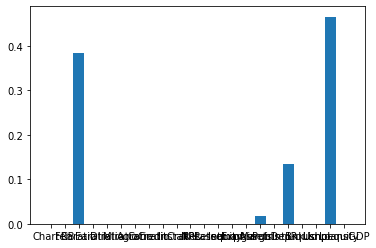

In [52]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
Mdls = GridSearchCV(tree.DecisionTreeClassifier(),parameters, n_jobs=4)
Mdls = Mdls.fit(X, y)
Mdl = Mdls.best_estimator_
imp = Mdl.feature_importances_


I = np.arange(imp.shape[0])
plt.bar(I,imp)
plt.xticks(I,features);
best_param = Mdl.get_params()
best_param

The CA ratio is very important

In [53]:

pred = Mdl.predict(X)
accuracy = np.mean(pred==y)
accuracy

0.8477588258627529

Lets look at the Confusion Matrix:  the matrix of true and false decisions We see that it is quite accurate for the full sample.

In [54]:
tn, fp, fn, tp = np.ravel(confusion_matrix(pred,y))
CM = [[tp/(tp+fn), fp/(tn+fp) ],
      [fn/(tp+fn), tn/(tn+fp) ]]
CM

[[0.7612732095490716, 0.14957474648348054],
 [0.23872679045092837, 0.8504252535165194]]

In [55]:
confusion_matrix(pred,y, normalize='true')

array([[0.85042525, 0.14957475],
       [0.23872679, 0.76127321]])

Lets do a repeat set of draws for in an out of sample tests.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

nexp=500
test_size = 1- 500/y.shape[0]

false_positives = []
false_negatives = []
accuracies = []
clf = tree.DecisionTreeClassifier(**best_param,  )
for experiment in (range(nexp)):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CM = confusion_matrix(y_test, pred, normalize='true')
    
    false_positives.append(CM[0,1])# it was actually negative class (0-th row in the CM), and falsely predicted positve(1-th column)
    false_negatives.append(CM[1,0])
    accuracies.append(accuracy_score(y_test, pred))
    

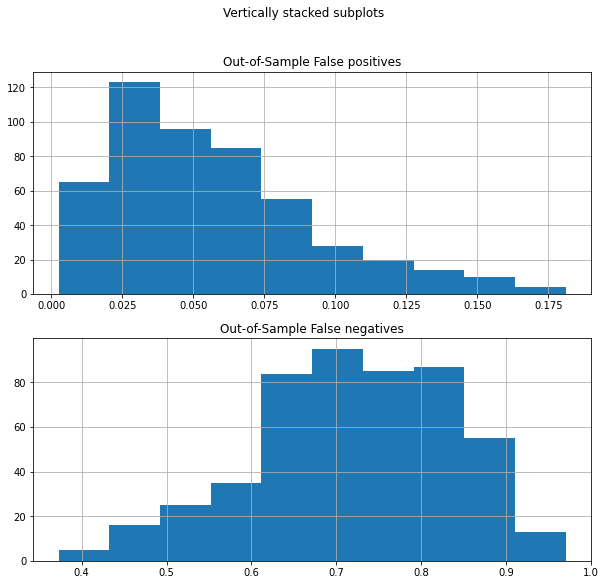

In [57]:
fig, axs = plt.subplots(2, figsize=(10, 9))
fig.suptitle('Vertically stacked subplots')
axs[0].hist(false_positives)
axs[0].set_title('Out-of-Sample False positives')
axs[0].grid(True)

axs[1].hist(false_negatives)
axs[1].set_title('Out-of-Sample False negatives')
axs[1].grid(True)

(array([  5.,   8.,  14.,  10.,  16.,  37.,  67., 123., 161.,  59.]),
 array([0.78075176, 0.7877406 , 0.79472945, 0.8017183 , 0.80870715,
        0.81569599, 0.82268484, 0.82967369, 0.83666254, 0.84365138,
        0.85064023]),
 <BarContainer object of 10 artists>)

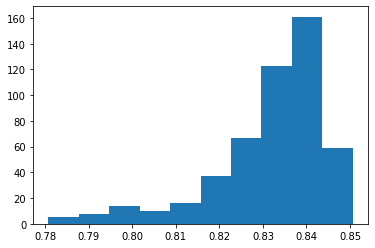

In [59]:
plt.hist(accuracies)

We see the out of sample predictive accuracy stats, very different.

$\textbf{Neural Network Classification}$

Now lets look at the same data with neural net prediction.
We load in the data and then set up a patternnet neural neet with 31 neurons.
We put in options not to show the intermediate training data in windows.

In [60]:
import sklearn 
X = sklearn.preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)

In [61]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(7), max_iter=1000).fit(X, y)
clf.fit(X,y)

pred = clf.predict(X) # note, 1 is positive class
accuracy = accuracy_score(y,pred)

CM = confusion_matrix(y, pred, normalize='true')
true_positive = CM[1,1]
true_negative = CM[0,0]
false_positive = CM[0,1]
false_negative = CM[1,0]

accuracy

0.8697342324474415

We have  an 80 percent accuracy rate, not bad.

Lets simulate the model around the median to get the relative importance.

In [62]:
X_median = np.median(X, axis=0).reshape((1,-1)) # (1,D)
proba_median = clf.predict_proba(X_median)
proba_median.shape

(1, 2)

In [63]:
proba_median

array([[0.96654723, 0.03345277]])

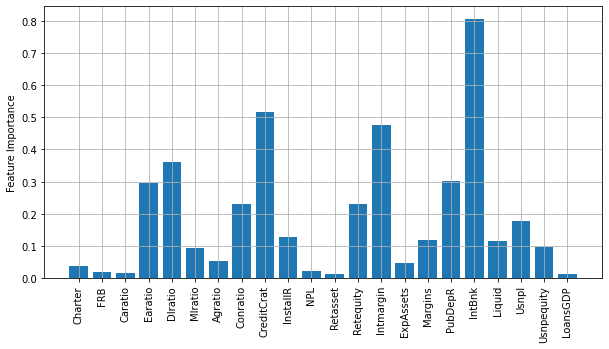

In [64]:
D = X.shape[1]
importance = []
for i in range(D):
    #print(x_median_i_perturbed)
    x_median_i_perturbed = X_median.copy()
    x_median_i_perturbed[0,i]+=0.00001
    
    proba_median_perturbed = clf.predict_proba(x_median_i_perturbed)
    imp = abs(proba_median_perturbed[:,1] - proba_median[:,1])/0.00001 
    importance.append(imp)
importance = np.array(importance).reshape(-1)
    
feature_indices = np.arange(len(importance))

plt.figure(figsize=(10, 5))
plt.bar(feature_indices,importance)
plt.xticks(feature_indices, df.columns[:-1], rotation='vertical')
plt.ylabel('Feature Importance')
plt.grid(True)

We see gender and class are important


Now let's look at out of sample performance of the network.

In [ ]:
K = 500
test_size = 1-K/y.shape[0]

false_positives = []
false_negatives = []
accuracies = []

for j in range(100):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size)
    clf = MLPClassifier(random_state=1, hidden_layer_sizes=(7), max_iter=1000).fit(X, y)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CM = confusion_matrix(y_test, pred, normalize='true')
    
    false_positives.append(CM[0,1])# it was actually negative class (0-th row in the CM), and falsely predicted positve(1-th column)
    false_negatives.append(CM[1,0])
    accuracies.append(accuracy_score(y_test, pred))
    
    

C:\Users\mcnel\.julia\conda\3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
fig, axs = plt.subplots(2, figsize=(10, 9))
fig.suptitle('Vertically stacked subplots')
axs[0].hist(false_positives)
axs[0].set_title('Out-of-Sample False positives')
axs[0].grid(True)

axs[1].hist(false_negatives)
axs[1].set_title('Out-of-Sample False negatives')
axs[1].grid(True)

In [ ]:
plt.hist(accuracies)